# Insurance Claims Fraud Detection

In [1]:
# Importing Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance_claim_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


So here we have 1000 rows and 40 columns in data
- fraud_reported is  our target variable

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- Here we have 19 numerical and 21 object columns present in the dataset.

In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

 - There is no null value present in the columns except _c39 column so dropping it

In [5]:
# droping _c39 column so dropping it.
df.drop('_c39',axis=1,inplace=True)

In [6]:
df.shape

(1000, 39)

In [7]:
# printing all data type  and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('***************************************************************')

05-08-1992    3
01-01-2006    3
28-04-1992    3
29-01-1998    2
21-12-2002    2
             ..
25-11-1994    1
12-02-2009    1
28-03-2001    1
17-12-2003    1
10-12-2014    1
Name: policy_bind_date, Length: 951, dtype: int64
***************************************************************
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
***************************************************************
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
***************************************************************
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
***************************************************************
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
***************************************************************
machine-op-inspct    93
prof-specialty       85
tech-support         78
sal

In [8]:
# replacing '?' with No Info
df=df.replace('?','No Info')

- Some of the rows having ? sign replacing them with No Info

In [9]:
# printing all data type  and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('***************************************************************')

05-08-1992    3
01-01-2006    3
28-04-1992    3
29-01-1998    2
21-12-2002    2
             ..
25-11-1994    1
12-02-2009    1
28-03-2001    1
17-12-2003    1
10-12-2014    1
Name: policy_bind_date, Length: 951, dtype: int64
***************************************************************
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
***************************************************************
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
***************************************************************
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
***************************************************************
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
***************************************************************
machine-op-inspct    93
prof-specialty       85
tech-support         78
sal

# Description of Dataset

In [10]:
# statisticla summary of numerical columns
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


This gives the statistical information of the numerical columns . The summary of this dataset looks perfect 

From the above description we can observe the following things.

- The count of all the columns are same which means there are no missing values in the dataset.
- The mean value is greater than the median(50%) in most of the columns which means the data is skewed to right in these columns
- The data in the few columns have mean value less than median that means the data is skewed to left
- By summerising the data we can observe there is huge difference between 75% and max in most of the columns hence there are outliers present in the data which we will remove them leter on using approprate methods.
- We can also notice the Standard deviation , min, 25% percentile values from this describe method.

In [11]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

- We can see there is one row in negative value must be the mistake or not sure  so dropping the row

In [12]:
df.loc[df['umbrella_limit']== -1000000]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,526039,04-05-1995,OH,100/300,500,1338.54,-1000000,438178,...,1,No Info,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [13]:
# droping that value row(one row only)
df.drop(df[df['umbrella_limit']== -1000000].index,inplace=True)

In [14]:
# dividing ['incident_data'] into three other columns
df['incident_Date']=df['incident_date'].str.split('-').str[0]
df['incident_Month']=df['incident_date'].str.split('-').str[1]
df['incident_Year']=df['incident_date'].str.split('-').str[2]

In [15]:
# in incident data all the incident is from 2015 so droping the incident_year
df['incident_Year'].value_counts()
df.drop('incident_Year',axis=1,inplace=True)

In [16]:
# dividing policy_bind_date into three other columns
df['policy_bind_Date']=df['policy_bind_date'].str.split('-').str[0]
df['policy_bind_Month']=df['policy_bind_date'].str.split('-').str[1]
df['policy_bind_Year']=df['policy_bind_date'].str.split('-').str[2]

# droping policy_bind_date column
df.drop('policy_bind_date',axis=1,inplace=True)

In [17]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,4550,Accura,RSX,2009,N,17,02,06,06,2014


In [18]:
# droping the policy_number and other useless columns as well
df.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)

In [19]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,4550,Accura,RSX,2009,N,17,02,06,06,2014


In [20]:
df.shape

(999, 40)

In [21]:
df['fraud_reported'].value_counts()

N    752
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

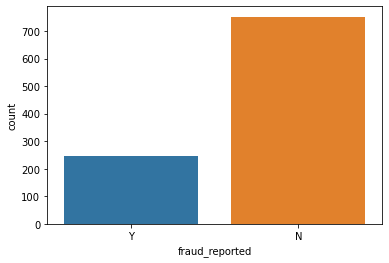

In [22]:
sns.countplot(df['fraud_reported'])

- We can notice data is imbalance we chave to deal with it.

# EDA

In [23]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,4550,Accura,RSX,2009,N,17,02,06,06,2014


<AxesSubplot:>

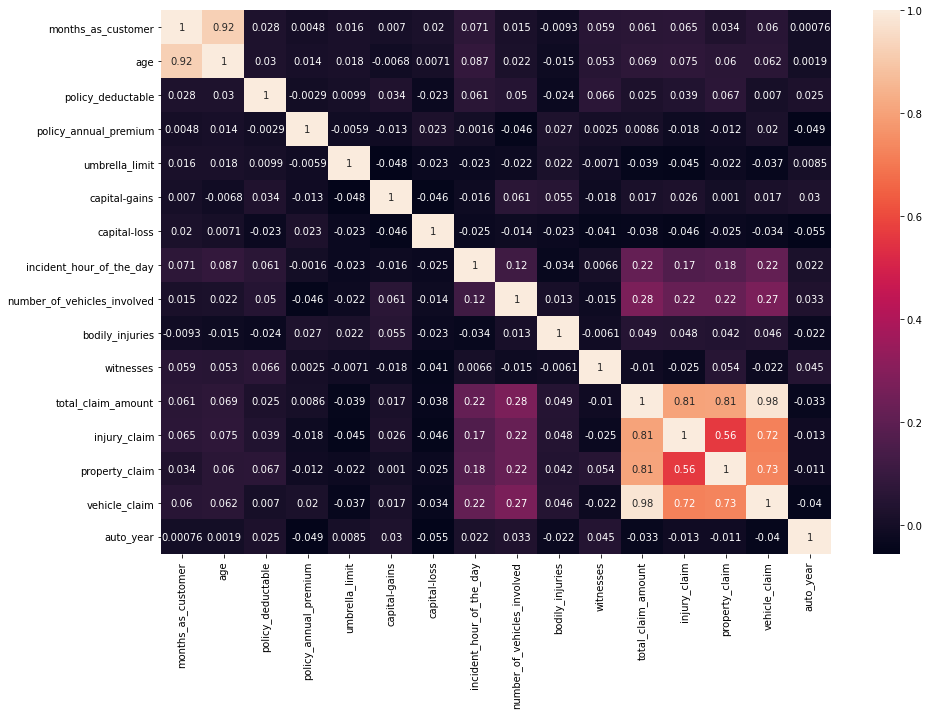

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

- We can notice total_claim_amount, injury_claim, property_claim and vehicle_claim are highly correlated with each other .
- All other  columns are very least correlated with each other.

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

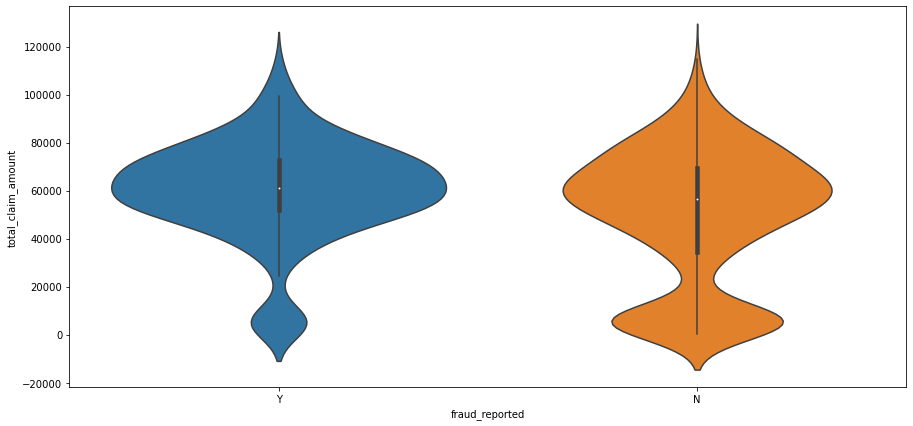

In [25]:
plt.figure(figsize=(15,7))
sns.violinplot(y='total_claim_amount',x='fraud_reported',data=df)

- Most of fraud reported found where total claimed amount 50000 to 70000

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

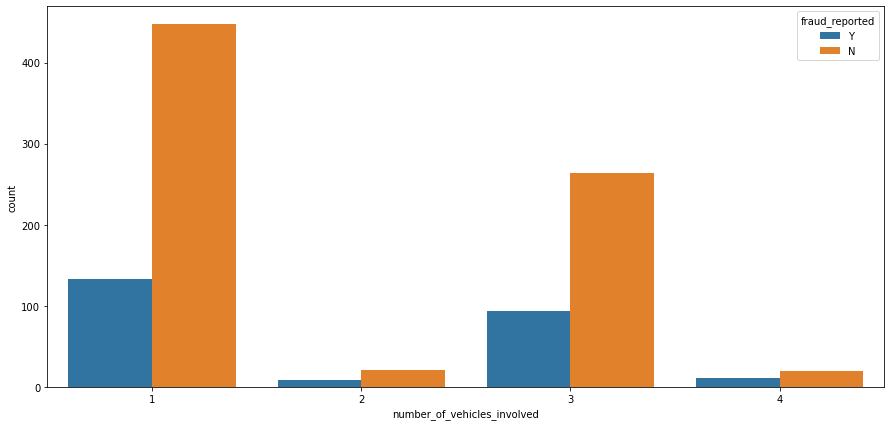

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=df)

- Most of the fraud report were found where number_of_vehicles_involved more than 1

<AxesSubplot:xlabel='incident_city', ylabel='count'>

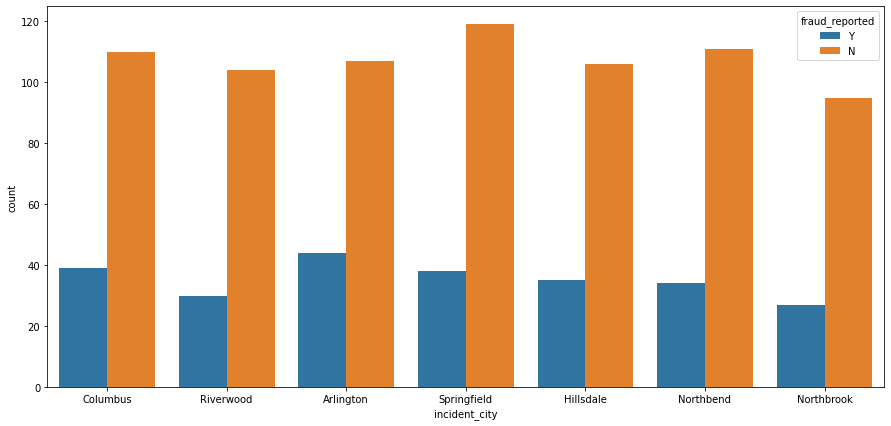

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_city',hue='fraud_reported',data=df)

- In all cities fraud reported counts are almost same.

<AxesSubplot:xlabel='incident_state', ylabel='count'>

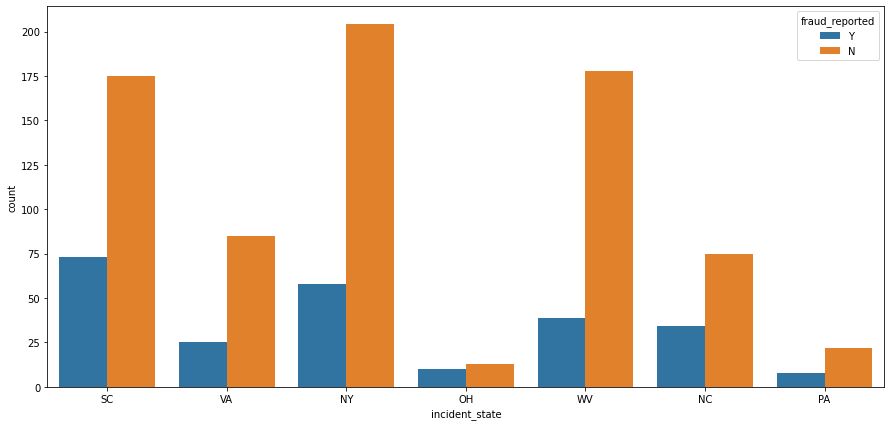

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_state',hue='fraud_reported',data=df)

- Most of the fraud reported were fonund where incident state was SC, NY, OH, NC and PA

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

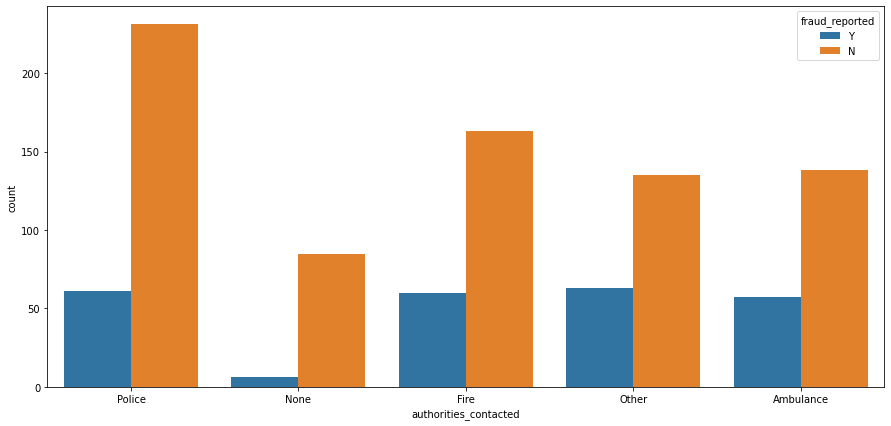

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)

- Most of the fraud founded where cx have contacted authorities_contacted of Fire, Other and Ambulance

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

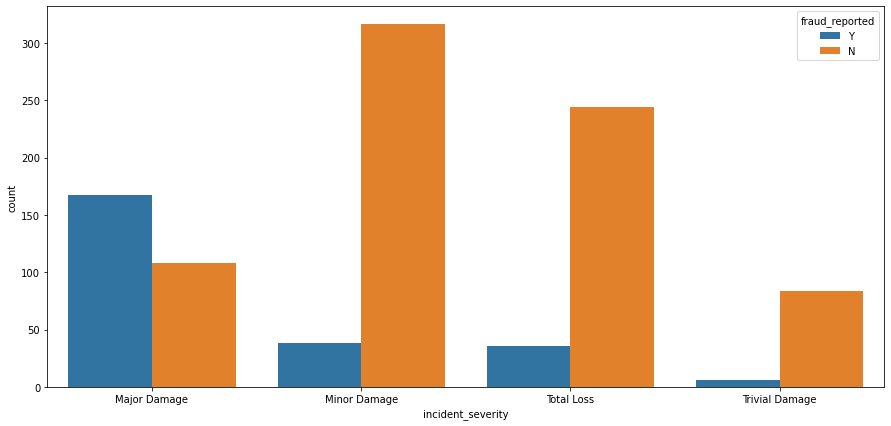

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)

- Most of fraud reported claim are Major Damage , most of them are counted as fraud
- There are very fraud report in Trivial damage.

<AxesSubplot:xlabel='collision_type', ylabel='count'>

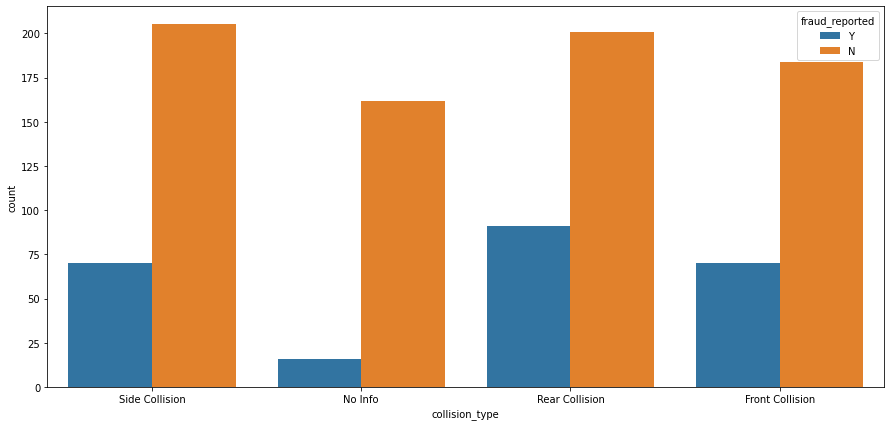

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(x='collision_type',hue='fraud_reported',data=df)

- Most of fraud reported claims in Side Collision, Rear Collision and Front Collision.
- Some of reported claim we have those are in no info of collision type

<AxesSubplot:xlabel='incident_type', ylabel='count'>

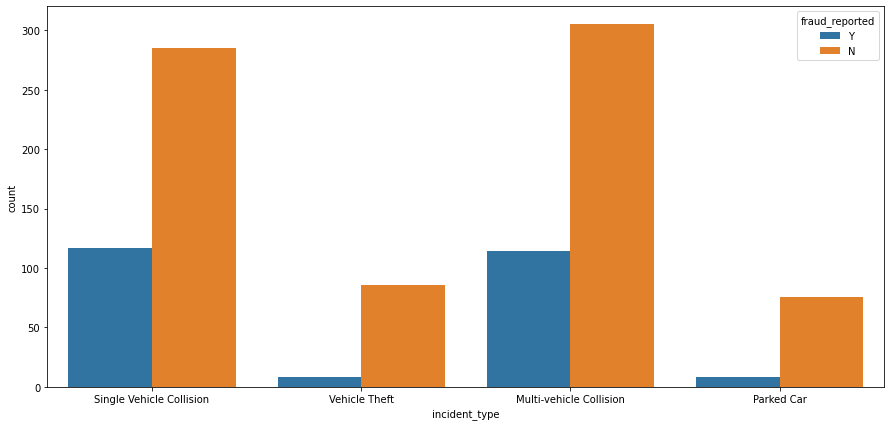

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_type',hue='fraud_reported',data=df)

- We have most claim reported and fraud reported in Single vehicle collision and multi-vehicle collision incident type.
- In other two incident type vehicle theft an dparked car are very less fraud report.

<AxesSubplot:xlabel='incident_Month', ylabel='count'>

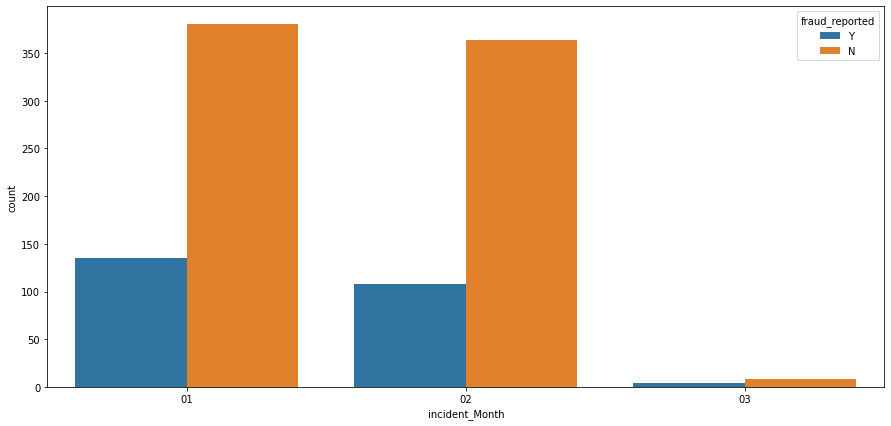

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_Month',hue='fraud_reported',data=df)

- Most of the data we have reported in month 1 and 2 fraud reported are also around same in both months.

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

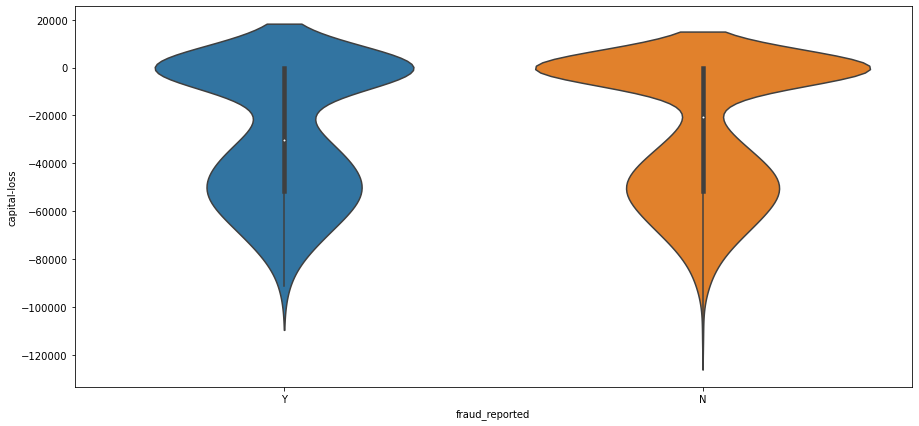

In [34]:
plt.figure(figsize=(15,7))
sns.violinplot(y='capital-loss',x='fraud_reported',data=df)

- Most of fraud reported we see in cx those capital loss are and -40000 to -60000

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

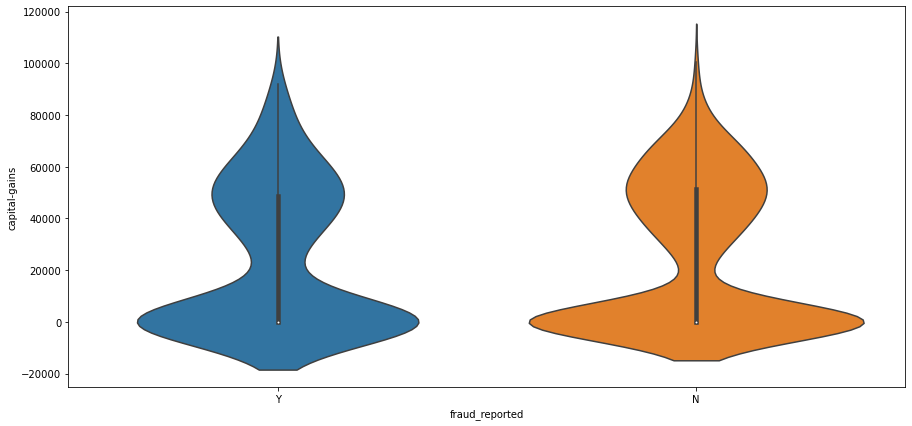

In [35]:
plt.figure(figsize=(15,7))
sns.violinplot(y='capital-gains',x='fraud_reported',data=df)

- Most of the fraud reported are in cx those capital gains are 0 and around 50000

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

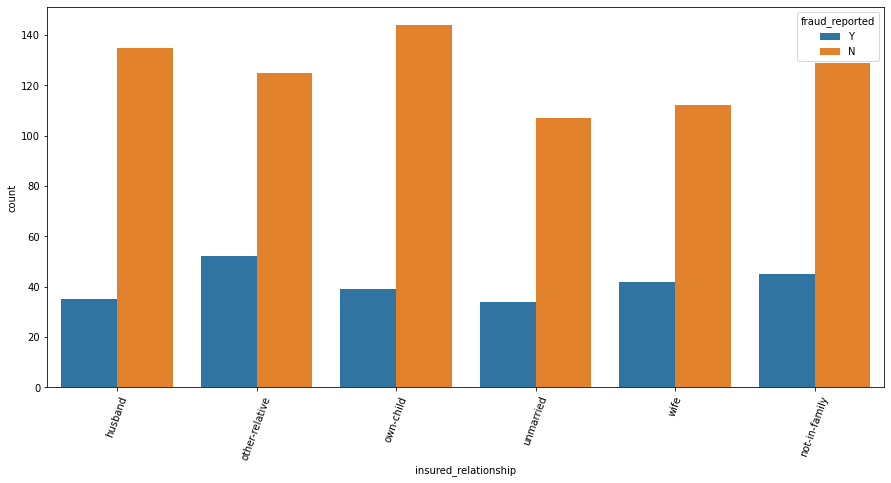

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

- According to the data info, cx those having insured relationship with other relative and wife are most reported than others.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

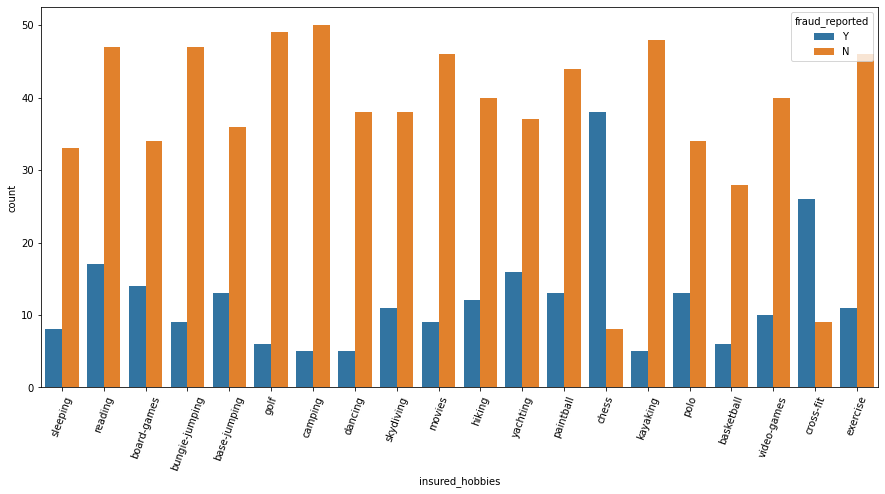

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

- Here we can see the cx those hobbies are Chess, are most fraud reported cx.
- Here we can see the cx those hobbies are cross-fit , are also most fraud reported cx
- After that cx those hobbies are reading, board games, base-jumping, yechting, painball, polo and etc also most fraud report cx than others

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

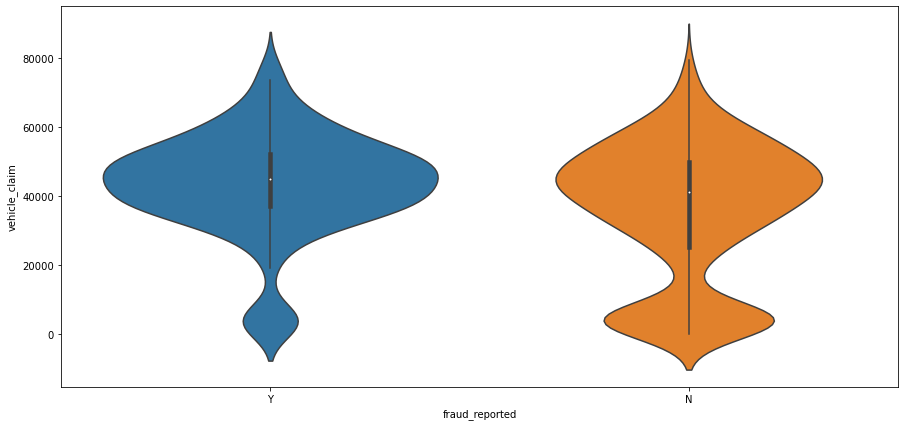

In [38]:
plt.figure(figsize=(15,7))
sns.violinplot(y='vehicle_claim',x='fraud_reported',data=df)

- In vehicle_claim most of the cx are between 100 to 6500
- Fraud report is higher in cx are between 3500 to 5500 vehicle_claim

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

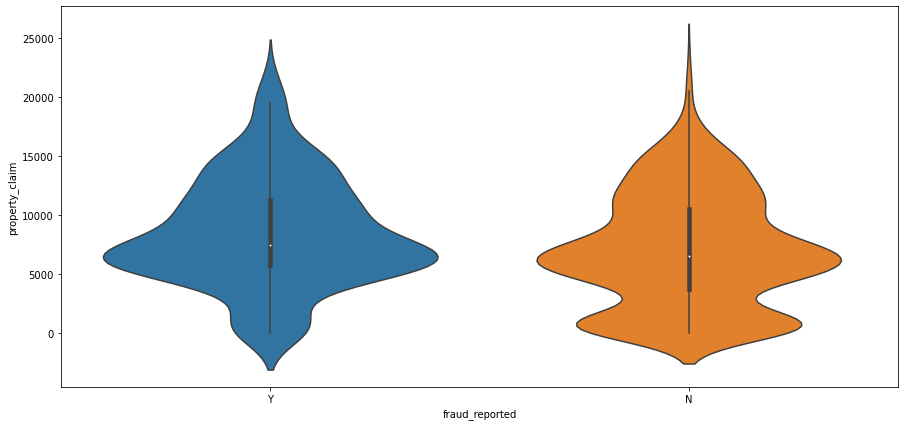

In [39]:
plt.figure(figsize=(15,7))
sns.violinplot(y='property_claim',x='fraud_reported',data=df)

- In Property claim fraud reported is higher in cx claimed of 5000 to 8000

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

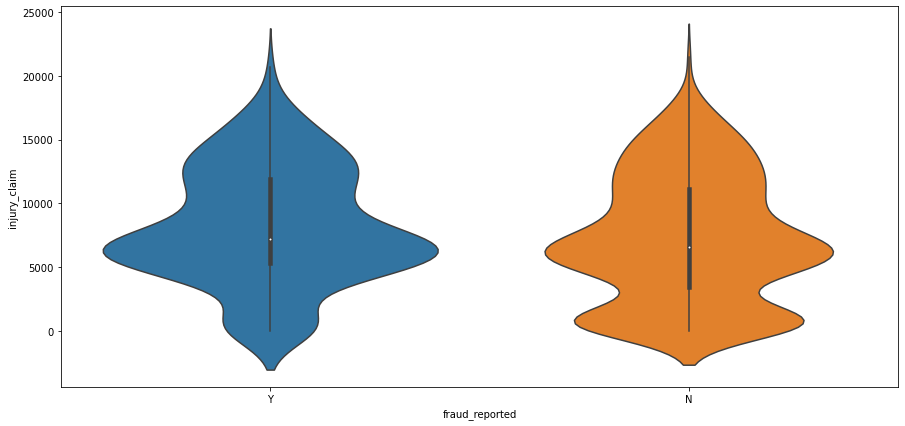

In [40]:
plt.figure(figsize=(15,7))
sns.violinplot(y='injury_claim',x='fraud_reported',data=df)

- Most of the cx injury claim is 100 to 15000
- Most fraud reported cx are between 5000 to 8000 injury claim 

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

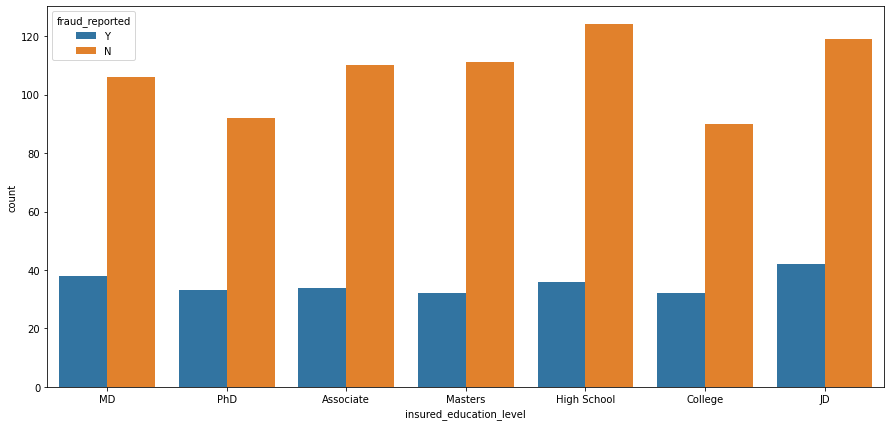

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_education_level', hue='fraud_reported',data=df)

- We higher cx those are education level is High School and least cx in PhD and College
- There is very little difference in fraud report in all kind of cx
- Fraud report is little higher in cx those education level is JD, MD, PhD, and College than others.

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

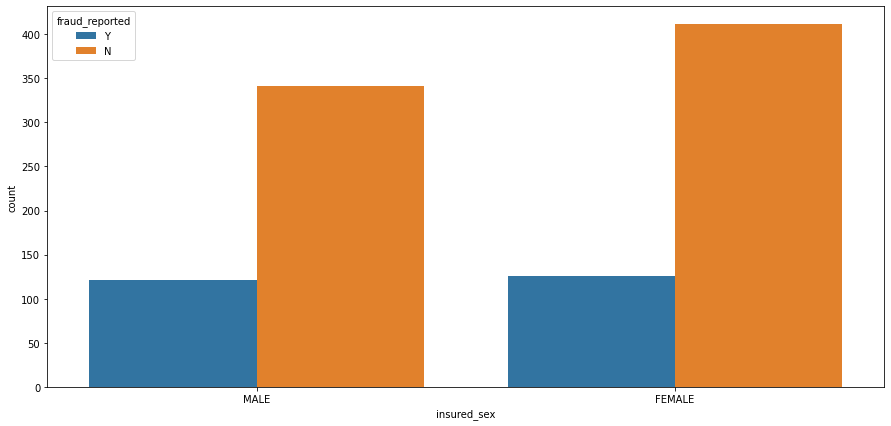

In [42]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_sex', hue='fraud_reported', data=df)

- We have more cx in Female than the Male
- But fraud reported is little high Male cx

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

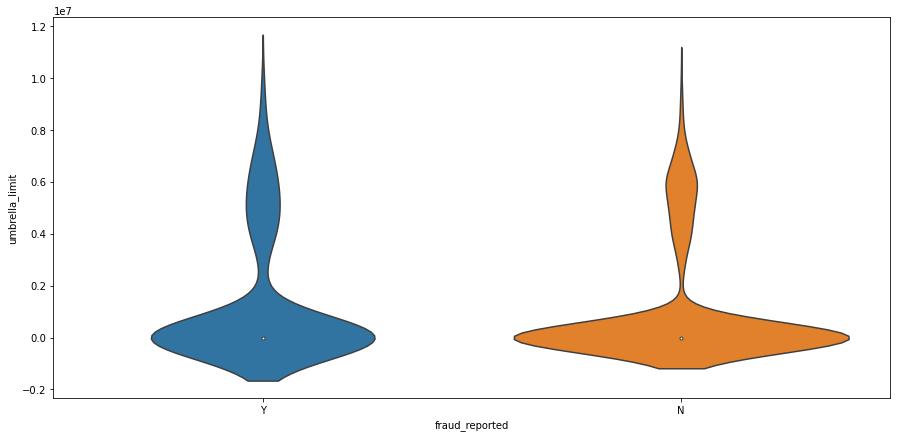

In [43]:
plt.figure(figsize=(15,7))
sns.violinplot(x='fraud_reported',y='umbrella_limit',data=df)

- Most of cx we have their umbrella limit is 0
- fraud reported is also high those cx

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

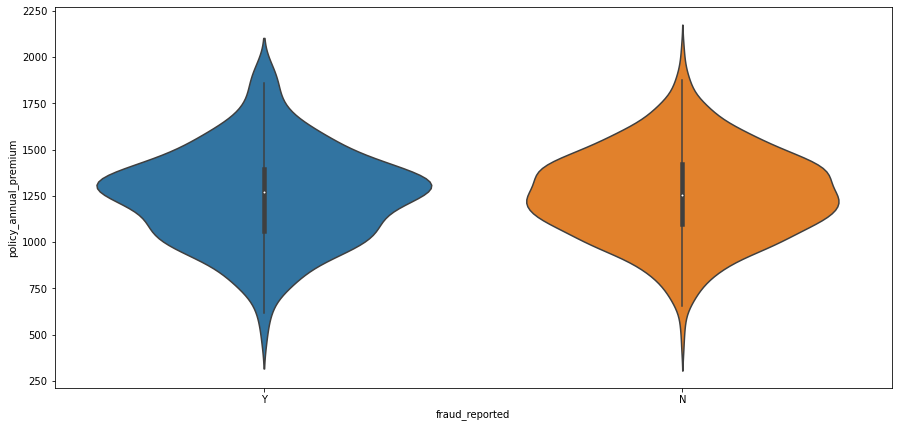

In [44]:
plt.figure(figsize=(15,7))
sns.violinplot(x='fraud_reported',y='policy_annual_premium',data=df)

- Most of cx we have 1000 to 1500 of premiums payers
- Most of the fraud reported we found in those premium is 1250 to 1300

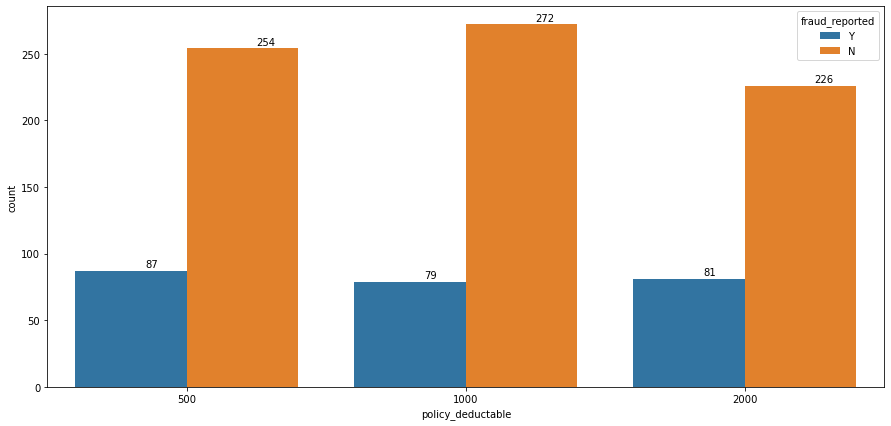

In [45]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x='policy_deductable',hue='fraud_reported',data=df)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

- Here we notice here according to count fraud report high in cx of 2000 policy_deductable

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

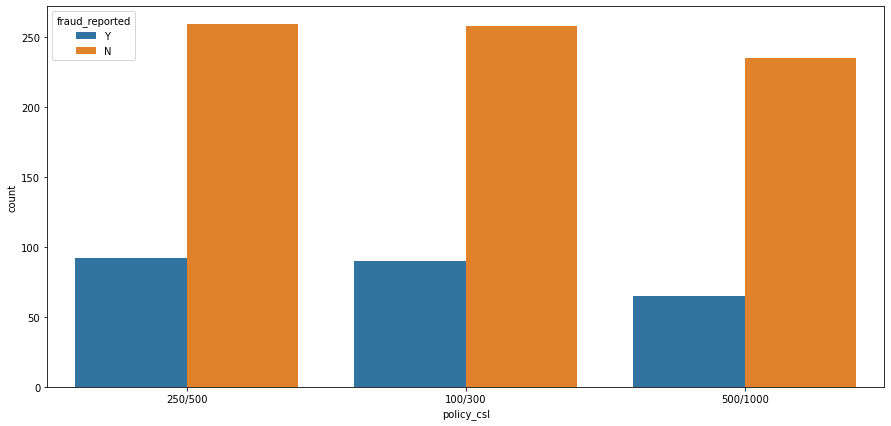

In [46]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_csl',hue='fraud_reported',data=df)

- In all three csl we same kind of similarity fraud report is also common in all policy_csl

<AxesSubplot:xlabel='policy_state', ylabel='count'>

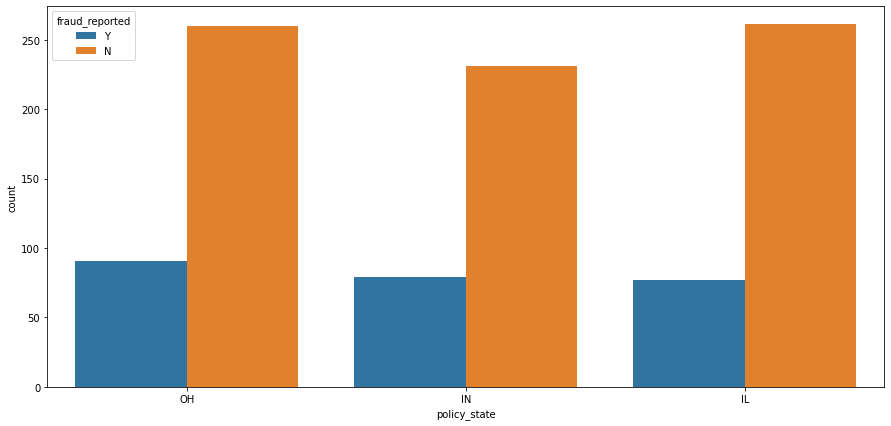

In [47]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_state',hue='fraud_reported',data=df)

- We have cx from three stats and fraud report almost common in all three states.

<AxesSubplot:xlabel='age', ylabel='count'>

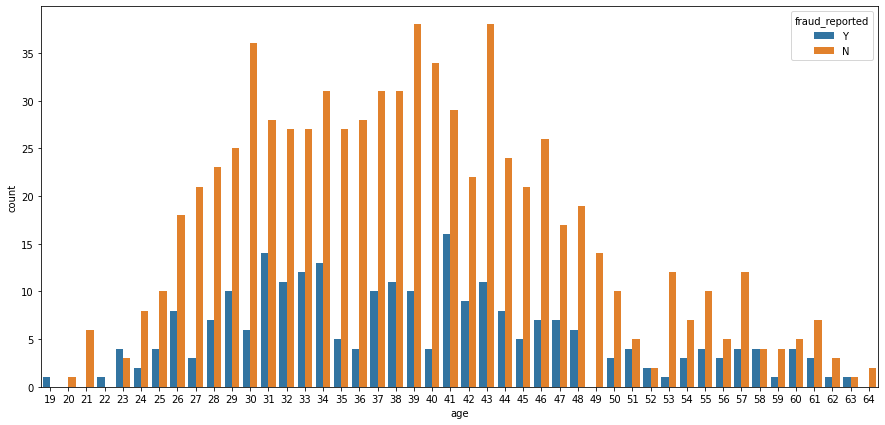

In [48]:
plt.figure(figsize=(15,7))
sns.countplot(x='age',hue='fraud_reported',data=df)

- We see most of the cx are age of 26 to 50
- Fraud reported is higher in cx 26 to 50 of age.

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

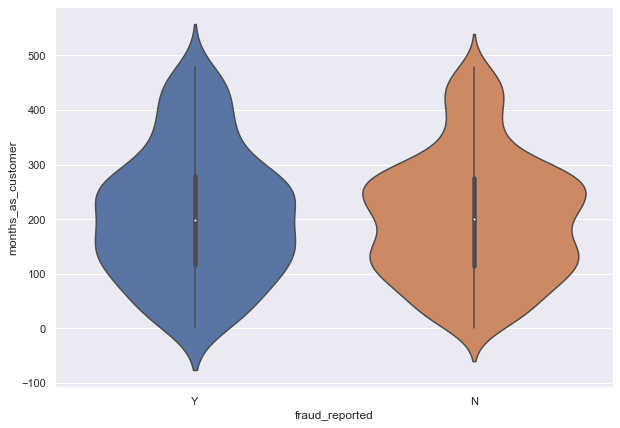

In [49]:
plt.figure(figsize=(10,7))
sns. set(color_codes=True)
sns.violinplot(y='months_as_customer',x='fraud_reported',data=df)

- Most of the cx are 100 to 300 months old
- We can notice here fraud reort is high in cx between 100 to 250 months old

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2014'),
  Text(1, 0, '2006'),
  Text(2, 0, '2000'),
  Text(3, 0, '1990'),
  Text(4, 0, '1997'),
  Text(5, 0, '2011'),
  Text(6, 0, '2002'),
  Text(7, 0, '1999'),
  Text(8, 0, '2012'),
  Text(9, 0, '1998'),
  Text(10, 0, '1992'),
  Text(11, 0, '2005'),
  Text(12, 0, '2004'),
  Text(13, 0, '1994'),
  Text(14, 0, '1991'),
  Text(15, 0, '1996'),
  Text(16, 0, '2013'),
  Text(17, 0, '2008'),
  Text(18, 0, '2003'),
  Text(19, 0, '2010'),
  Text(20, 0, '1993'),
  Text(21, 0, '1995'),
  Text(22, 0, '2007'),
  Text(23, 0, '2001'),
  Text(24, 0, '2009'),
  Text(25, 0, '2015')])

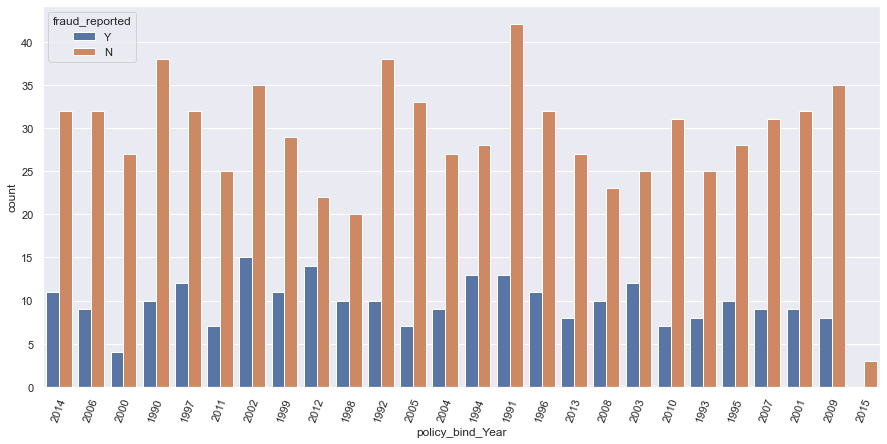

In [50]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_bind_Year',hue='fraud_reported',data=df)
plt.xticks(rotation =70,)

- Here we notice fraud report is high in policy_vind_Year of 2014, 2006, 1990, 1997, 2002, 1999, 2012, 1998, 1994, 2008, 2003 and etc thanothers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

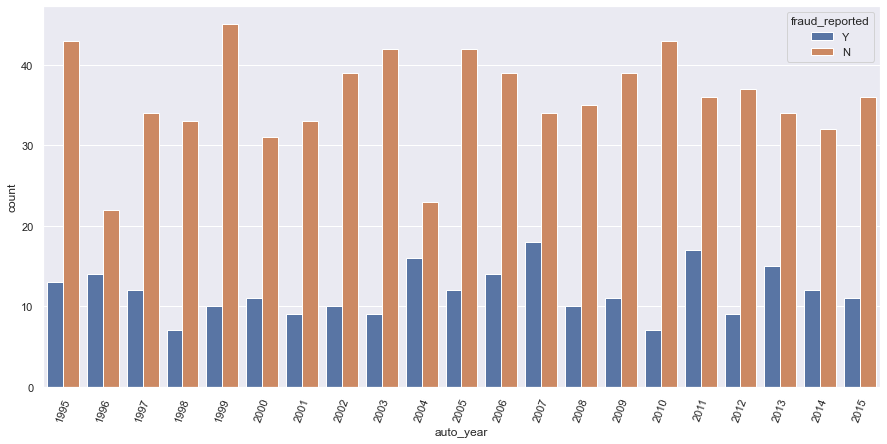

In [51]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_year',hue='fraud_reported',data=df)
plt.xticks(rotation =70,)

- We can notice we have less vehicle from 1998 and 20010 auto year
- According to vehicle count fraud reported is higher in vehicle of 1996, 2004, 2007, 2011, 2013, 2014 and etc auto year than others 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

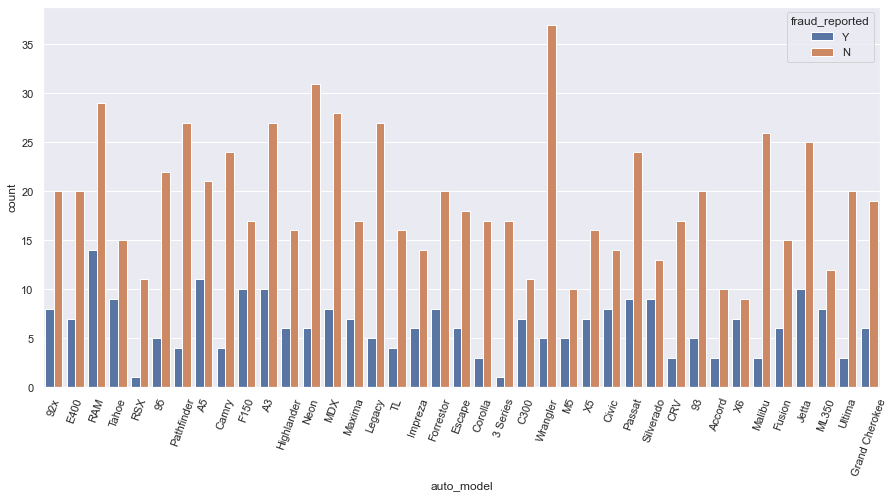

In [52]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_model',hue='fraud_reported',data=df)
plt.xticks(rotation =70,)

- Most of auto_model we see in Wrangler, RAM , Pathfinder, Neon and etc.
- We can notice Fraud report is higher in 92x, RAM, E400, Tahore, A5, F150, X5, C300, M5, CIVIC, SILVERADOX6 ML300 and etc auto_models

<AxesSubplot:xlabel='auto_make', ylabel='count'>

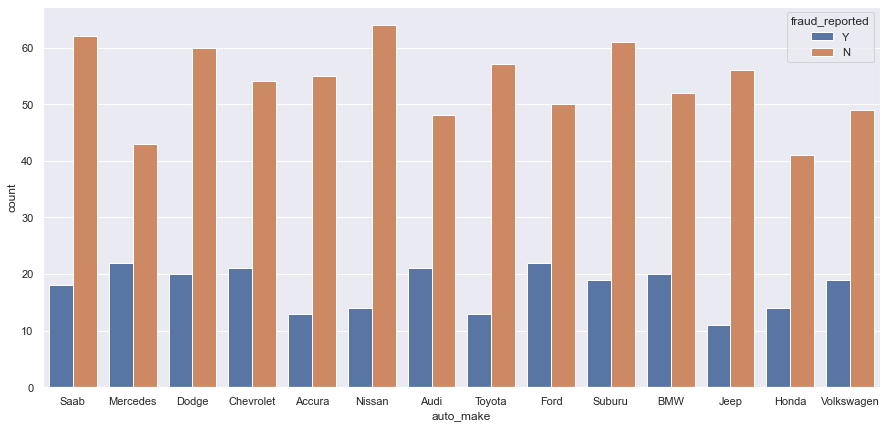

In [53]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

- Fraud reported claim is higher in Saab, Merceded, Dodge, Chevrolet, Audi , Ford, Suburu BMW and volkswagen auto_make
- In Other Auto_make brand is less than other.

Have done the analysis of all important features, some of features don't have much information to define

# Skewness Handling

# Skew and Outliers will be handel in numerical columns only

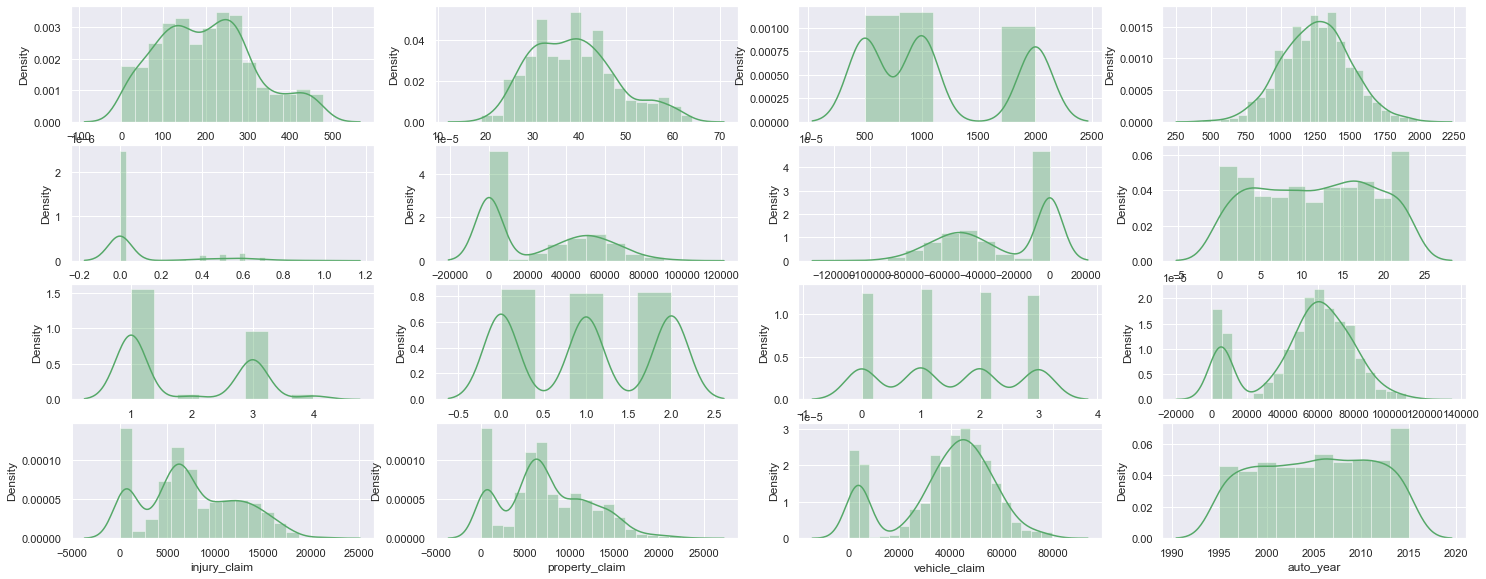

In [54]:
# ploting for numerical columns only
plt.figure(figsize=(25,20))
for i in enumerate(df.select_dtypes(include=['int64','float','int32'])):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [55]:
df.select_dtypes(include=['int64','float','int32']).skew()

months_as_customer             0.364014
age                            0.479796
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.806100
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
total_claim_amount            -0.595646
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.622627
auto_year                     -0.049502
dtype: float64

Skewness more than +/-0.5 will we treated

Object and target variable columns will not be treated

we can see here most of the columns are skewed

will only deal with numerical columns

- umbrella_limit
- total_claim_amount
-vehicle_claim

will be treated

In [56]:
from sklearn.preprocessing import power_transform

df[['umbrella_limit','total_claim_amount','vehicle_calim']]=power_transform(
     df[['umbrella_limit','total_claim_amount','vehicle_claim']],method='yeo-johnson')

# Outliers Handling

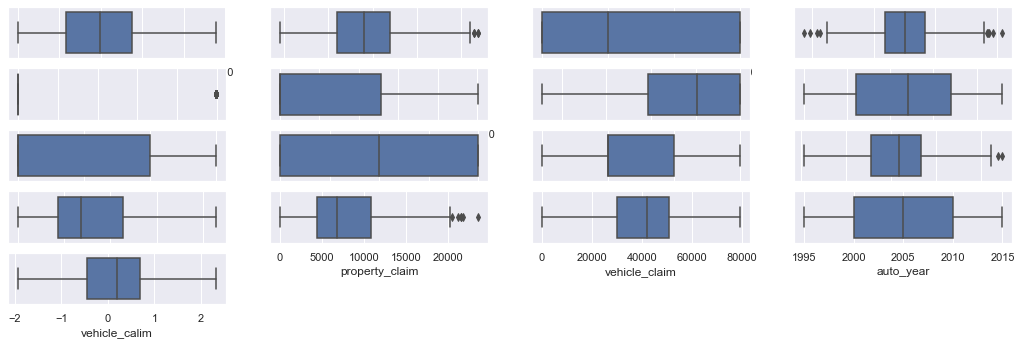

In [57]:
plt.figure(figsize=(18,10))
for i in enumerate(df.select_dtypes(include=['int64','float','int32'])):
    plt.subplot(9,4,i[0]+1)
    sns.boxplot(df[i[1]])

- Only some of columns seems having outliers after skewness removed

# Outliers Removal

# ZSCORE Method

In [58]:
from scipy.stats import zscore

z=np.abs(zscore(df.select_dtypes(include=['int64','float','int32'])))

print(np.where(z>3))

(array([229, 248, 499, 762, 806], dtype=int64), array([ 3,  3, 13,  3,  6], dtype=int64))


In [59]:
df_1=df[(z<3).all(axis=1)]
print(("with outliers::",df.shape))
print("After removing outliers::",df_1.shape)

('with outliers::', (999, 41))
After removing outliers:: (994, 41)


-  After using zscore method we only lose 5 rows from data

# IQR Method

In [60]:
from scipy import stats
IQR = stats.iqr(df.select_dtypes(include=['int64','float','int32']))
IQR

1997.574235635032

In [61]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

df_out = df.select_dtypes(include=['int64','float','int32'])[~((df.select_dtypes(include=['int64','float','int32']) < (Q1 - 1.5 * IQR)) |(df.select_dtypes(include=['int64','float','int32']) > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)                          
                          

(311, 17)


choosing Zscore because there is huge dataloss in IQR

In [62]:
df= df_1

# Using LabelEncoder for convering categorical to numerical

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    object 
 3   policy_csl                   994 non-null    object 
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    object 
 8   insured_education_level      994 non-null    object 
 9   insured_occupation           994 non-null    object 
 10  insured_hobbies              994 non-null    object 
 11  insured_relationship         994 non-null    object 
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
# encoding  object columns into Numeric values in df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categ_data = df.select_dtypes(exclude=['int64','float','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    int32  
 3   policy_csl                   994 non-null    int32  
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    int32  
 8   insured_education_level      994 non-null    int32  
 9   insured_occupation           994 non-null    int32  
 10  insured_hobbies              994 non-null    int32  
 11  insured_relationship         994 non-null    int32  
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

- All columns are converted into numerical now

# Dividing data into X and Y

In [67]:
x = df.drop(['fraud_reported'],axis=1)
y = df['fraud_reported']

In [68]:
x.shape

(994, 40)

In [69]:
y.shape

(994,)

Here are the dimension of x and y

# Scaling X values

In [70]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [71]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64

So here we can see there is no null value present in the dataset.

In [72]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,...,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.426698,0.443975,0.507042,0.474849,0.424883,0.502476,0.201896,0.463783,0.494634,0.512692,...,0.475653,0.504179,0.508790,0.505785,0.467270,0.248994,0.480751,0.506585,0.463380,0.452576
std,0.240313,0.203319,0.415523,0.402499,0.408046,0.168078,0.401223,0.498938,0.324961,0.309271,...,0.237333,0.310061,0.293301,0.300326,0.288265,0.261924,0.293300,0.318378,0.294742,0.235036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242171,0.288889,0.000000,0.000000,0.000000,0.385783,0.000000,0.000000,0.166667,0.230769,...,0.379765,0.230769,0.263158,0.250000,0.233333,0.000000,0.233333,0.181818,0.200000,0.349015
50%,0.417537,0.422222,0.500000,0.500000,0.333333,0.502305,0.000000,0.000000,0.500000,0.538462,...,0.528494,0.538462,0.526316,0.500000,0.466667,0.000000,0.483333,0.545455,0.480000,0.499869
75%,0.577766,0.572222,1.000000,1.000000,1.000000,0.613049,0.000000,1.000000,0.833333,0.769231,...,0.637564,0.769231,0.763158,0.750000,0.700000,0.500000,0.733333,0.818182,0.720000,0.612979
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here we can see the data have been scalled.

# Imbalanced learn

Using Oversampling BoarderlineSMOTE

- because there is less data in Churn for yes

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

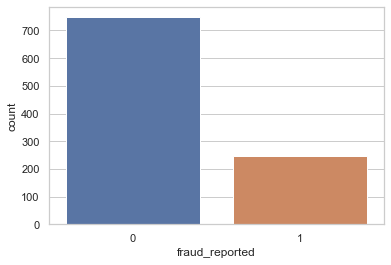

In [73]:
sns.set_style("whitegrid")
sns.countplot(x='fraud_reported',data=df)

In [74]:
from imblearn.over_sampling import BorderlineSMOTE

x_rus, y_rus = BorderlineSMOTE().fit_resample(x,y)
print('Original Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

Original Target dataset shape: (994,)
Resample Target dataset shape (1496,)


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

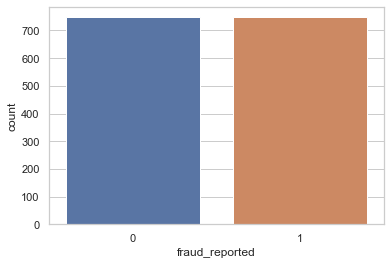

In [75]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

- Now we have balanced data for model training.

# Spliting Train and Test data

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [78]:
x_train.shape

(1092, 40)

In [79]:
y_train.shape

(1092,)

In [80]:
x_test.shape

(404, 40)

In [81]:
y_test.shape

(404,)

So her we sucessfully split train and test data , now move on for model building

# Model Building

In [82]:
# importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

# Logistic Regression

In [83]:
logreg = LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("Cross validation score for logreg:",np.mean(logreg_score))

Cross validation score for logreg: 0.7446688963210703


In [84]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))

print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7128712871287128
[[122  64]
 [ 52 166]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       186
           1       0.72      0.76      0.74       218

    accuracy                           0.71       404
   macro avg       0.71      0.71      0.71       404
weighted avg       0.71      0.71      0.71       404

Training accuracy:: 0.7628205128205128
Test accuracy:: 0.7128712871287128


# Decision Tree Classifier

In [85]:
dtc = DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("Cross validation score for dtc:",np.mean(dtc_score))

Cross validation score for dtc: 0.8369654403567447


In [86]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)

print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))

print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.806930693069307
[[141  45]
 [ 33 185]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       186
           1       0.80      0.85      0.83       218

    accuracy                           0.81       404
   macro avg       0.81      0.80      0.80       404
weighted avg       0.81      0.81      0.81       404

Training accuracy:: 1.0
Test accuracy:: 0.806930693069307


# KNeighbors Classifier

In [87]:
knn = KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("Cross validation score for knn :",np.mean(knn_score))

Cross validation score for knn : 0.6597703455964326


In [88]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)

print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))

print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6633663366336634
[[ 61 125]
 [ 11 207]]
              precision    recall  f1-score   support

           0       0.85      0.33      0.47       186
           1       0.62      0.95      0.75       218

    accuracy                           0.66       404
   macro avg       0.74      0.64      0.61       404
weighted avg       0.73      0.66      0.62       404

Training accuracy:: 0.7261904761904762
Test accuracy:: 0.6633663366336634


# Random Forest Classifier

In [89]:
rfc = RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("Cross validation score for rfc :",np.mean(rfc_score))

Cross validation score for rfc : 0.8744147157190636


In [90]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)

print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))

print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.844059405940594
[[157  29]
 [ 34 184]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       186
           1       0.86      0.84      0.85       218

    accuracy                           0.84       404
   macro avg       0.84      0.84      0.84       404
weighted avg       0.84      0.84      0.84       404

Training accuracy:: 1.0
Test accuracy:: 0.844059405940594


# Ensemble Technique

# 1. AdaBoost Classifier

In [91]:
adb = AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=5,scoring='accuracy')
print("Cross validation score for adb :",np.mean(adb_score))

Cross validation score for adb : 0.8383389074693424


In [92]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)

print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))

print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.8193069306930693
[[152  34]
 [ 39 179]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       186
           1       0.84      0.82      0.83       218

    accuracy                           0.82       404
   macro avg       0.82      0.82      0.82       404
weighted avg       0.82      0.82      0.82       404

Training accuracy:: 0.8946886446886447
Test accuracy:: 0.8193069306930693


# 2. Bagging Classifier

In [93]:
bgc = BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=5,scoring='accuracy')
print("Cross validation score for bgc :",np.mean(bgc_score))

Cross validation score for bgc : 0.8730479375696767


In [94]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)

print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))

print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.8564356435643564
[[155  31]
 [ 27 191]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       186
           1       0.86      0.88      0.87       218

    accuracy                           0.86       404
   macro avg       0.86      0.85      0.86       404
weighted avg       0.86      0.86      0.86       404

Training accuracy:: 0.9935897435897436
Test accuracy:: 0.8564356435643564


# 3. Gradient Boosting Classifier

In [95]:
grbc = GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=5,scoring='accuracy')
print("Cross validation score for grbc :",np.mean(grbc_score))

Cross validation score for grbc : 0.8790858416945374


In [96]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)

print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))

print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8910891089108911
[[156  30]
 [ 14 204]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       186
           1       0.87      0.94      0.90       218

    accuracy                           0.89       404
   macro avg       0.89      0.89      0.89       404
weighted avg       0.89      0.89      0.89       404

Training accuracy:: 0.9734432234432234
Test accuracy:: 0.8910891089108911


# Observation :
    
    Choosing :-
        
        - Gradietn  Boostin Classifier as final model for Hyper Parameter Tuning because both train and test accuracies are close and highest as well
        - Rest of the models having huge difference between train and test accuracies so no considering them.

# Hyper Parameter Tuning : GradietnBoostingClassifier

In [97]:
adb=GradientBoostingClassifier()
param_grid={
    'criterion' :['mse','mae'],
    'n_estimators' :[100,200],
    'learning_rate' :[0.1,0.5,1.0],
     'random_state' :[5],
}

In [98]:
adb_grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=1)

In [99]:
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Accuracy after parameter tuning:: 0.8589108910891089


In [100]:
adb_grid.best_params_

{'criterion': 'mse',
 'learning_rate': 1.0,
 'n_estimators': 200,
 'random_state': 5}

# Model Training with best parameters

In [101]:
best_param={
    'criterion' :['mse'],
    'n_estimators' :[200],
    'learning_rate' :[0.1],
     'random_state' :[5],
}

In [102]:
best_adb_grid=GridSearchCV(GradientBoostingClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [103]:
best_adb_grid.fit(x_train,y_train)
best_adb_pred=best_adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_adb_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8910891089108911


As we notice after Hyper Parameter Tuning models accuracy score got increased

# Report of GradientBoostingClassifier

In [104]:
print("Classification Report::\n",classification_report(y_test,best_adb_pred))

Classification Report::
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       186
           1       0.88      0.92      0.90       218

    accuracy                           0.89       404
   macro avg       0.89      0.89      0.89       404
weighted avg       0.89      0.89      0.89       404



<AxesSubplot:>

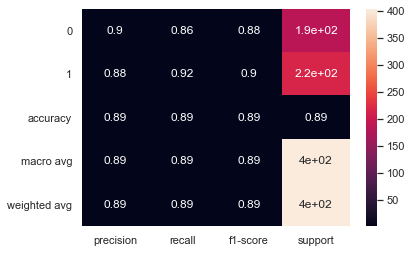

In [105]:
clsf_repo = classification_report(y_test,best_adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

# Plotting AUC ROC curve

In [106]:
from sklearn.metrics import roc_auc_score

In [107]:
print("roc auc score::",roc_auc_score(y_test,best_adb_pred))

roc auc score:: 0.8888231232119956


In [108]:
from sklearn.metrics import roc_curve

In [109]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_adb_pred, pos_label=1)

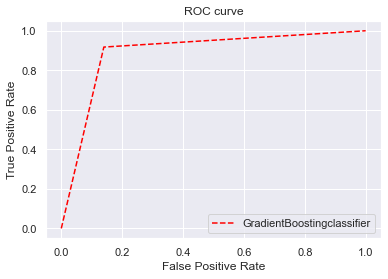

In [110]:
# plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1,linestyle='--',color='red', label='GradientBoostingclassifier')

plt.title("ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

# Saving the Model

In [111]:
import joblib
joblib.dump(best_adb_grid.best_estimator_,'InsuranceClaims-FraudDetection.obj')

['InsuranceClaims-FraudDetection.obj']

So here save the best model using joblib library.

# Prediction Result

In [112]:
# loading the saved model
model=joblib.load("InsuranceClaims-FraudDetection.obj")

# Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [115]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,0,0
4,0,1
...,...,...
399,0,0
400,1,1
401,1,1
402,0,0


So here we can observe that the actual predicted values are almost same, that means our model worked well.